In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d yudhaislamisulistya/plants-type-datasets

 99% 1.33G/1.34G [00:14<00:00, 112MB/s]
100% 1.34G/1.34G [00:14<00:00, 100MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plants-type-datasets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = "/content/dataset_type_of_plants_new"
import cv2
from google.colab.patches import cv2_imshow

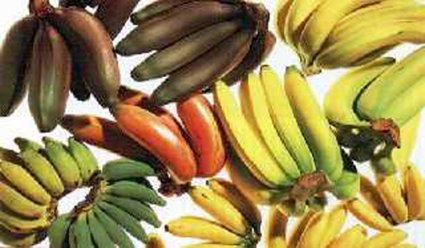

(248, 425, 3)

In [ ]:
img = cv2.imread("/content/dataset_type_of_plants_new/banana/banana100.jpg")
cv2_imshow(img)
img.shape

In [ ]:
from PIL import Image
import os

# Path to the directory containing the images
directory = '/content/dataset_type_of_plants_new'

# Iterate over each image in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is an image
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            # Open the image file
            image_path = os.path.join(root, file)
            image = Image.open(image_path)

            # Resize the image
            resized_image = image.resize((120, 120))

            try:
                # Save the resized image as JPEG, overwriting the original file
                resized_image.save(image_path)
                print(f"Resized {file} to 120x120 and saved as JPEG")
            except OSError as e:
                # Convert the image to RGB mode and save as JPEG
                rgb_image = resized_image.convert("RGB")
                new_image_path = os.path.splitext(image_path)[0] + ".jpg"
                rgb_image.save(new_image_path)
                print(f"Resized {file} to 120x120 and saved as RGB JPEG: {new_image_path}")


Streaming output truncated to the last 5000 lines.
Resized longbeans976.jpg to 120x120 and saved as JPEG
Resized longbeans812.jpg to 120x120 and saved as JPEG
Resized longbeans574.jpg to 120x120 and saved as JPEG
Resized longbeans523.jpg to 120x120 and saved as JPEG
Resized longbeans454.jpg to 120x120 and saved as JPEG
Resized longbeans322.jpg to 120x120 and saved as JPEG
Resized longbeans518.jpg to 120x120 and saved as JPEG
Resized longbeans533.jpg to 120x120 and saved as JPEG
Resized longbeans221.jpg to 120x120 and saved as JPEG
Resized longbeans82.jpg to 120x120 and saved as JPEG
Resized longbeans244.jpg to 120x120 and saved as JPEG
Resized longbeans415.jpg to 120x120 and saved as JPEG
Resized longbeans364.jpg to 120x120 and saved as JPEG
Resized longbeans234.jpg to 120x120 and saved as JPEG
Resized longbeans671.jpg to 120x120 and saved as JPEG
Resized longbeans460.jpg to 120x120 and saved as JPEG
Resized longbeans864.jpg to 120x120 and saved as JPEG
Resized longbeans760.jpg to 120x

In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

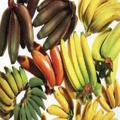

(120, 120, 3)

In [ ]:
img = cv2.imread("/content/dataset_type_of_plants_new/banana/banana100.jpg")
cv2_imshow(img)
img.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(120,120,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))




model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dense(500,activation='relu'))

model.add(Dense(30,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0

In [ ]:
model.compile(loss = "categorical_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)




train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(120,120),
    class_mode='categorical',
    shuffle=True
)



Found 30000 images belonging to 30 classes.


In [ ]:
history = model.fit(train_generator,

                    epochs=5

                    )


Epoch 1/5
938/938 [==============================] - 147s 145ms/step - loss: 2.9792 - accuracy: 0.1438
Epoch 2/5
938/938 [==============================] - 135s 144ms/step - loss: 2.4017 - accuracy: 0.2813
Epoch 3/5
938/938 [==============================] - 134s 143ms/step - loss: 2.1712 - accuracy: 0.3489
Epoch 4/5
938/938 [==============================] - 135s 144ms/step - loss: 2.0071 - accuracy: 0.4016
Epoch 5/5
938/938 [==============================] - 142s 151ms/step - loss: 1.8830 - accuracy: 0.4362


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test_img = cv2.imread('/content/dataset_type_of_plants_new/mango/mango0.jpg')
test_img = cv2.resize(test_img,(120,120))
test_input1 = test_img.reshape((1,120,120,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)


1/1 [==============================] - 0s 19ms/step
7


In [ ]:
import os
folder = '/content/dataset_type_of_plants_new'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]

In [ ]:
sub_folder[7]

'bilimbi'